# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
!pip install koreanize_matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.9/7.9 MB 41.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_beta = pd.read_csv( '/content/drive/MyDrive/DSL/EDA/25-1/data/·ÑÉ·Ö•·ÑÜ·ÖµX·Ñâ·Ö°·Ü´·Ñã·Ö•·Ü∏·Ñá·Öß·ÜØdata/·Ñâ·Ö°·Ü´·Ñã·Ö•·Ü∏·Ñá·Öß·ÜØ_·Ñá·Ö¶·Ñê·Ö°_nonshift_final.csv', index_col = 0)
df_beta.index = df_beta.index.str.replace("df_ÏΩîÏä§Ìîº_", "")
df_beta.head(3)

ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®    Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ    Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®     ÏòÅÏóÖÏù¥ÏùµÎ•†     Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®    Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•  log_ÎãπÏ¢åÎπÑÏú®  \
ÏóÖÏ¢Ö                                                                              
IT_ÏÑúÎπÑÏä§ -2.457572  0.597144 -1.171806  0.023690  30.309383  1.225219 -0.113932   
Í±¥ÏÑ§     -0.997468  0.687718 -0.022793  0.567957  -5.375150  0.104924  0.005802   
Í∏àÏÜç     -0.707515 -1.240226  0.923701  0.707894  13.614675  3.890025  0.044016   

        ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ  
ÏóÖÏ¢Ö                
IT_ÏÑúÎπÑÏä§ -0.036170  
Í±¥ÏÑ§      0.061801  
Í∏àÏÜç      0.598179

# **ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏßÑÌñâ**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score


betaÍ∞í Ïä§ÏºÄÏùºÎßÅ

In [ ]:
#Ïä§ÏºÄÏùºÎßÅ

import pandas as pd
from sklearn.preprocessing import RobustScaler

# robustScaler Í∞ùÏ≤¥ ÏÉùÏÑ±
scaler = RobustScaler()

# fit & transform ÏßÑÌñâÌïòÏó¨ ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞Î•º numpy Î∞∞Ïó¥Î°ú Î∞òÌôò
beta_scaled_array = scaler.fit_transform(df_beta)

# numpy Î∞∞Ïó¥ÏùÑ DataFrameÏúºÎ°ú Î≥ÄÌôò (ÏõêÎûòÏùò Ïù∏Îç±Ïä§ÏôÄ Ïª¨ÎüºÎ™ÖÏùÑ Ïú†ÏßÄ)
df_beta_scaled = pd.DataFrame(beta_scaled_array, index=df_beta.index, columns=df_beta.columns)

# Í≤∞Í≥º ÌôïÏù∏
print(df_beta_scaled.head())


          ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®    Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ    Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®     ÏòÅÏóÖÏù¥ÏùµÎ•†    Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®    Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•  log_ÎãπÏ¢åÎπÑÏú®  \
ÏóÖÏ¢Ö                                                                             
IT_ÏÑúÎπÑÏä§ -0.347381 -0.022014 -1.011320 -0.673756  1.351377  0.265121 -0.980421   
Í±¥ÏÑ§      0.199163  0.003823 -0.408447 -0.033771 -0.769466 -0.285760 -0.023875   
Í∏àÏÜç      0.307698 -0.546152  0.088166  0.130776  0.359158  1.575482  0.281417   
Í∏àÏúµ      0.809334 -0.659287  0.103386 -2.330154  0.040162  0.006133  2.727287   
Í∏∞Í≥Ñ_Ïû•ÎπÑ  -1.808590  0.946484 -0.360218 -0.385162  0.783238 -0.493371 -1.000942   

        ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ  
ÏóÖÏ¢Ö                
IT_ÏÑúÎπÑÏä§ -0.693053  
Í±¥ÏÑ§     -0.487227  
Í∏àÏÜç      0.639641  
Í∏àÏúµ     -0.090203  
Í∏∞Í≥Ñ_Ïû•ÎπÑ   0.090203  


In [ ]:
df_beta_scaled.describe()

ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®     Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ        Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®      ÏòÅÏóÖÏù¥ÏùµÎ•†     Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®  \
count  1.800000e+01  18.000000  1.800000e+01  18.000000  18.000000   
mean  -7.054019e-02   0.154953 -7.932218e-02  -0.011961  -0.178417   
std    1.083820e+00   1.052003  7.568223e-01   1.078915   0.792373   
min   -1.812441e+00  -1.616000 -1.332363e+00  -2.330154  -1.588742   
25%   -5.253077e-01  -0.497023 -6.772052e-01  -0.601608  -0.773668   
50%   -2.775558e-17   0.000000  2.775558e-17   0.000000   0.000000   
75%    4.746923e-01   0.502977  3.227948e-01   0.398392   0.226332   
max    2.652665e+00   3.132341  1.354150e+00   3.089891   1.351377   

             Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•      log_ÎãπÏ¢åÎπÑÏú®   ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ  
count  1.800000e+01  1.800000e+01  18.000000  
mean   1.931430e-01 -1.130990e-01  -0.060781  
std    1.009474e+00  1.201943e+00   1.425034  
min   -1.630840e+00 -3.066906e+00  -2.754241  
25%   -4.152901e-01 -5.753692e-01  -0.647816  
50%   -2.775558e-17 -3.469447e-18   0.000000  
75%    5.847099e-01  4.246308e-01   0.352184  
max    2.880337e+00  2.727287e+00   3.301633

In [ ]:
df_beta_scaled

ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®    Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ    Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®     ÏòÅÏóÖÏù¥ÏùµÎ•†    Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®    Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•  log_ÎãπÏ¢åÎπÑÏú®  \
ÏóÖÏ¢Ö                                                                              
IT_ÏÑúÎπÑÏä§  -0.347381 -0.022014 -1.011320 -0.673756  1.351377  0.265121 -0.980421   
Í±¥ÏÑ§       0.199163  0.003823 -0.408447 -0.033771 -0.769466 -0.285760 -0.023875   
Í∏àÏÜç       0.307698 -0.546152  0.088166  0.130776  0.359158  1.575482  0.281417   
Í∏àÏúµ       0.809334 -0.659287  0.103386 -2.330154  0.040162  0.006133  2.727287   
Í∏∞Í≥Ñ_Ïû•ÎπÑ   -1.808590  0.946484 -0.360218 -0.385162  0.783238 -0.493371 -1.000942   
ÎπÑÍ∏àÏÜç     -0.584617  0.840462  1.258901  3.089891 -0.067237  1.156543 -0.276026   
ÏÑ¨Ïú†_ÏùòÎ•ò    2.652665 -1.616000  0.631089  1.019803 -1.424850  2.880337  0.839731   
Ïò§ÎùΩ_Î¨∏Ìôî   -0.670145  0.581788 -1.332363  0.162168  0.669050  0.893058  0.413445   
Ïö¥ÏÜ°_Ï∞ΩÍ≥†   -0.199163 -0.287385 -0.823440  0.477134 -0.040162  0.649823  0.428360   
Ïö¥ÏÜ°Ïû•ÎπÑ_Î∂ÄÌíà  0.500605 -0.590708 -0.026155 -0.183994 -0.899521  0.345204  0.670517   
Ïú†ÌÜµ      -0.266719  0.239525 -0.017023  0.091841  0.068827 -0.083915 -0.598477   
ÏùåÏãùÎ£å_Îã¥Î∞∞   0.734924 -0.349635  0.395931  0.531147 -0.775069  0.389369  0.398991   
ÏùºÎ∞òÏÑúÎπÑÏä§    0.396953 -0.938531  0.503484 -0.701577  0.219628 -0.784047  0.719758   
Ï†ÑÍ∏∞_Í∞ÄÏä§   -1.782428  3.132341  1.354150  0.607629 -1.588742 -0.643726 -3.066906   
Ï†ÑÍ∏∞_Ï†ÑÏûê    0.231906 -0.003823  0.078053 -0.241955 -0.399587 -0.304476  0.023875   
Ï†úÏïΩ       0.635691  0.195536 -1.112225  0.033771 -1.166776 -0.006133 -0.506045   
Ï¢ÖÏù¥_Î™©Ïû¨   -1.812441  1.596190  0.017023 -0.999711  0.228566 -1.630840 -1.694615   
ÌôîÌïô      -0.267178  0.266545 -0.766791 -0.809382  0.199897 -0.452228 -0.391855   

         ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ  
ÏóÖÏ¢Ö                 
IT_ÏÑúÎπÑÏä§  -0.693053  
Í±¥ÏÑ§      -0.487227  
Í∏àÏÜç       0.639641  
Í∏àÏúµ      -0.090203  
Í∏∞Í≥Ñ_Ïû•ÎπÑ    0.090203  
ÎπÑÍ∏àÏÜç      2.486471  
ÏÑ¨Ïú†_ÏùòÎ•ò    3.301633  
Ïò§ÎùΩ_Î¨∏Ìôî   -2.754241  
Ïö¥ÏÜ°_Ï∞ΩÍ≥†    0.751785  
Ïö¥ÏÜ°Ïû•ÎπÑ_Î∂ÄÌíà  0.155790  
Ïú†ÌÜµ       0.167193  
ÏùåÏãùÎ£å_Îã¥Î∞∞   0.301040  
ÏùºÎ∞òÏÑúÎπÑÏä§   -0.512105  
Ï†ÑÍ∏∞_Í∞ÄÏä§   -1.517891  
Ï†ÑÍ∏∞_Ï†ÑÏûê    0.369232  
Ï†úÏïΩ      -0.192898  
Ï¢ÖÏù¥_Î™©Ïû¨   -2.051897  
ÌôîÌïô      -1.057538

In [ ]:
df_beta_scaled.to_csv('/content/drive/MyDrive/DSL/EDA/25-1/data/·ÑÉ·Ö•·ÑÜ·ÖµX·Ñâ·Ö°·Ü´·Ñã·Ö•·Ü∏·Ñá·Öß·ÜØdata/df_beta_scaled.csv')

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



X_train = df_beta_scaled.iloc[:,1:]

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor   Feature
0    5.506211    Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ
1    2.021920    Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®
2    2.828843     ÏòÅÏóÖÏù¥ÏùµÎ•†
3    1.281308    Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®
4    2.736645    Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•
5    3.765910  log_ÎãπÏ¢åÎπÑÏú®
6    4.210141  ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ


-> Ï∞®ÏõêÏ∂ïÏÜå ÏóÜÏù¥ ÏßÑÌñâ. Ï∂ïÏÜåÌï† Í≤ΩÏö∞ pÍ∞íÏùÑ Ìï¥ÏÑùÏóê Î∞òÏòÅ Ïñ¥Î†§ÏõåÏßê.

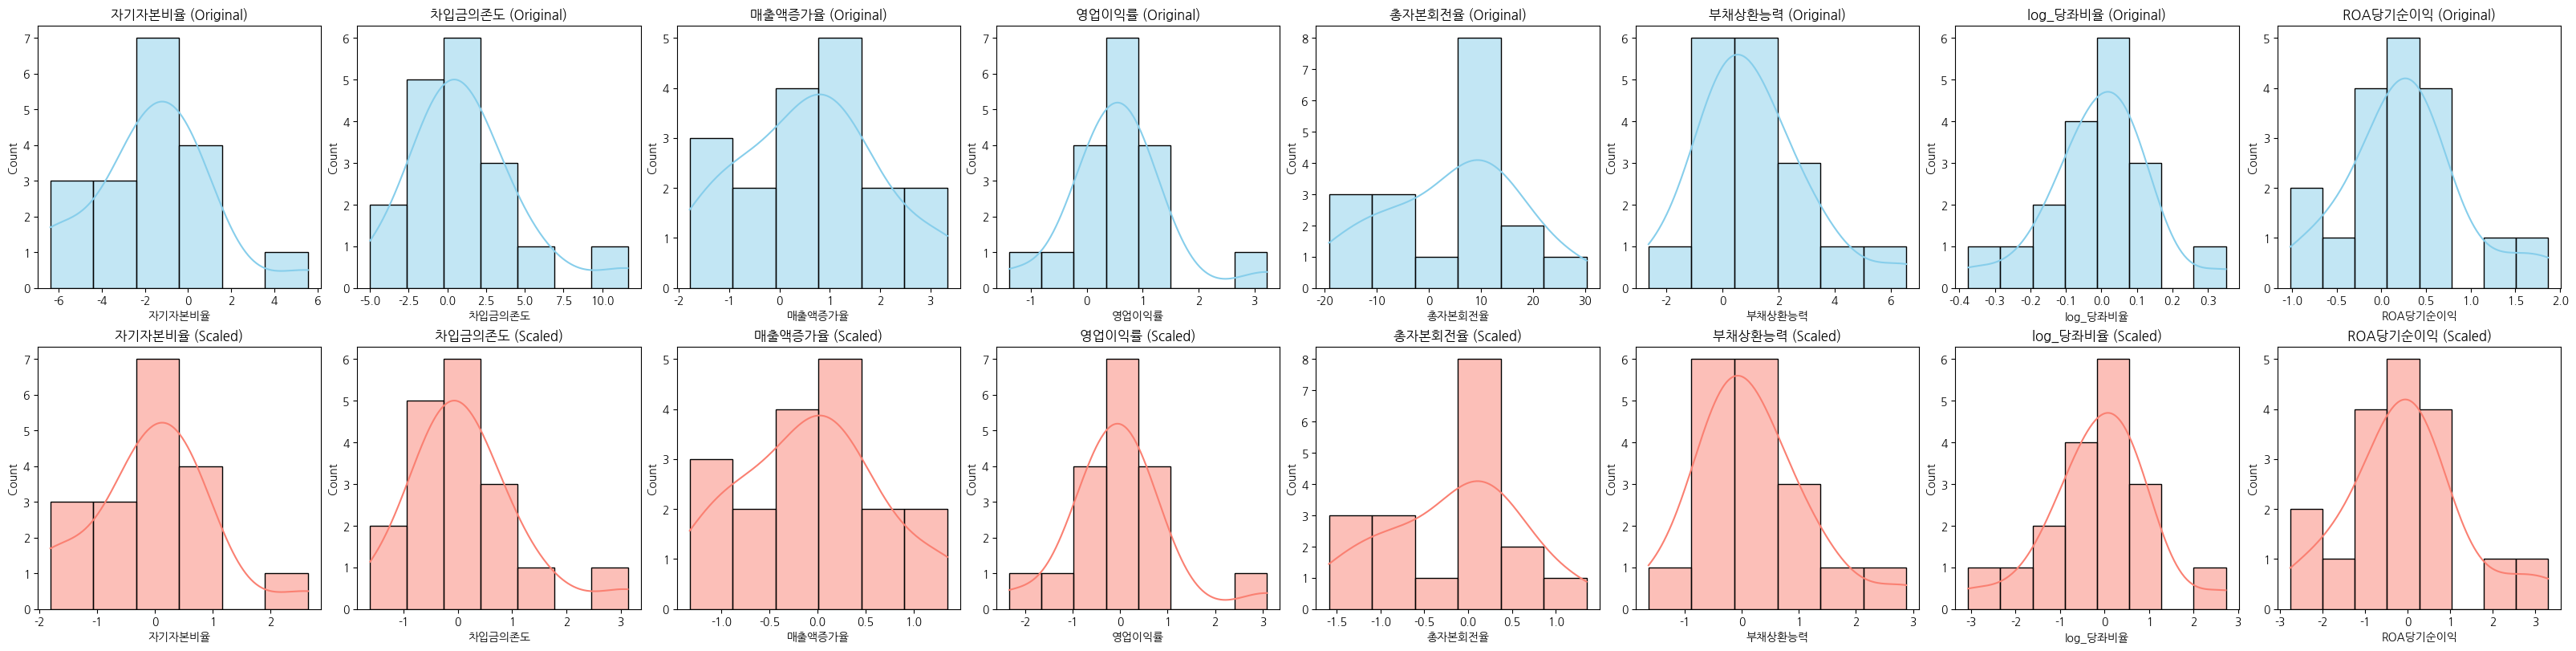

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2. Í∞Å Î≥ÄÏàòÎ≥Ñ Î∂ÑÌè¨Î•º Ï†Ñ/ÌõÑÎ°ú ÎπÑÍµêÌïòÎäî ÏãúÍ∞ÅÌôî ÏΩîÎìú
# Î≥ÄÏàò Í∞úÏàò
cols = df_beta.columns
n_cols = len(cols)

# FigureÏôÄ subplot ÏÉùÏÑ± (2Ìñâ: 1ÌñâÏùÄ ÏõêÎ≥∏, 2ÌñâÏùÄ ÌëúÏ§ÄÌôî ÌõÑ)
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(4*n_cols, 8), constrained_layout=True)

for i, col in enumerate(cols):
    # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ (ÏÉÅÎã®)
    sns.histplot(df_beta[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'{col} (Original)')

    # ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ (ÌïòÎã®)
    sns.histplot(df_beta_scaled[col], kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'{col} (Scaled)')

# Ï†ÑÏ≤¥ ÌîåÎ°Ø Ï∂úÎ†•
plt.show()


## Í≥ÑÏ∏µÏ†Å Íµ∞ÏßëÌôî

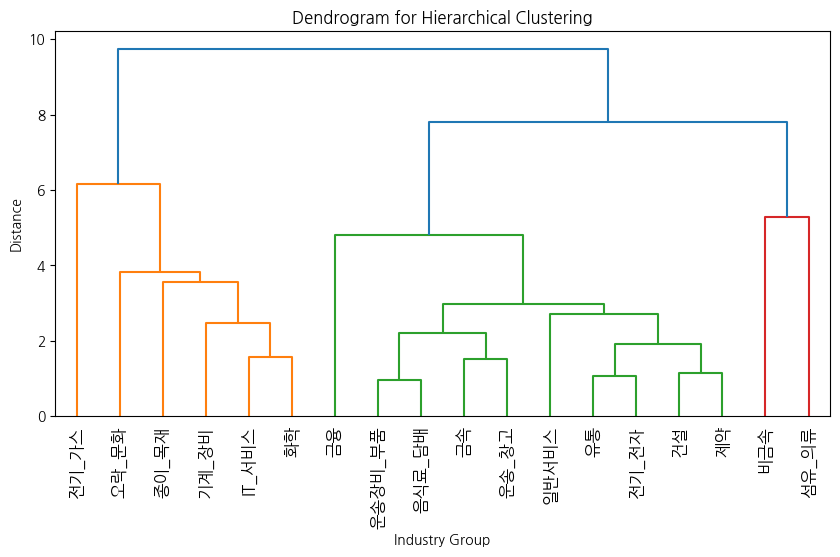

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 2Ô∏è‚É£ Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ (Ward Î∞©Î≤ï)
linkage_matrix = linkage(df_beta_scaled, method='ward')

# 3Ô∏è‚É£ Îç¥ÎìúÎ°úÍ∑∏Îû® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, leaf_rotation=90, labels=df_beta_scaled.index)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Industry Group")
plt.ylabel("Distance")
plt.show()

In [ ]:
data_prime = df_beta_scaled.copy()

In [ ]:
# used complete linkeage
# used euclidean distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='complete', metric='euclidean')

In [ ]:
cut_tree = fcluster(clusters, t=5.9, criterion='distance')
cut_tree

array([1, 3, 3, 3, 1, 4, 4, 1, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
# Ï†ÑÏ≤¥ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑† silhouette_score Í∞í
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.14910939 0.34381474 0.37722772 0.25368622 0.19294893] 
Silhouette Score shape: (18,) 

Silhouette Average Score:0.234


In [ ]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò ÌôïÏù∏
num_clusters = len(np.unique(cut_tree))
print(f"üîç ÌòÑÏû¨ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò: {num_clusters}")

üîç ÌòÑÏû¨ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò: 4


In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime

ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®    Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ    Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®     ÏòÅÏóÖÏù¥ÏùµÎ•†    Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®    Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•  log_ÎãπÏ¢åÎπÑÏú®  \
ÏóÖÏ¢Ö                                                                              
IT_ÏÑúÎπÑÏä§  -0.347381 -0.022014 -1.011320 -0.673756  1.351377  0.265121 -0.980421   
Í±¥ÏÑ§       0.199163  0.003823 -0.408447 -0.033771 -0.769466 -0.285760 -0.023875   
Í∏àÏÜç       0.307698 -0.546152  0.088166  0.130776  0.359158  1.575482  0.281417   
Í∏àÏúµ       0.809334 -0.659287  0.103386 -2.330154  0.040162  0.006133  2.727287   
Í∏∞Í≥Ñ_Ïû•ÎπÑ   -1.808590  0.946484 -0.360218 -0.385162  0.783238 -0.493371 -1.000942   
ÎπÑÍ∏àÏÜç     -0.584617  0.840462  1.258901  3.089891 -0.067237  1.156543 -0.276026   
ÏÑ¨Ïú†_ÏùòÎ•ò    2.652665 -1.616000  0.631089  1.019803 -1.424850  2.880337  0.839731   
Ïò§ÎùΩ_Î¨∏Ìôî   -0.670145  0.581788 -1.332363  0.162168  0.669050  0.893058  0.413445   
Ïö¥ÏÜ°_Ï∞ΩÍ≥†   -0.199163 -0.287385 -0.823440  0.477134 -0.040162  0.649823  0.428360   
Ïö¥ÏÜ°Ïû•ÎπÑ_Î∂ÄÌíà  0.500605 -0.590708 -0.026155 -0.183994 -0.899521  0.345204  0.670517   
Ïú†ÌÜµ      -0.266719  0.239525 -0.017023  0.091841  0.068827 -0.083915 -0.598477   
ÏùåÏãùÎ£å_Îã¥Î∞∞   0.734924 -0.349635  0.395931  0.531147 -0.775069  0.389369  0.398991   
ÏùºÎ∞òÏÑúÎπÑÏä§    0.396953 -0.938531  0.503484 -0.701577  0.219628 -0.784047  0.719758   
Ï†ÑÍ∏∞_Í∞ÄÏä§   -1.782428  3.132341  1.354150  0.607629 -1.588742 -0.643726 -3.066906   
Ï†ÑÍ∏∞_Ï†ÑÏûê    0.231906 -0.003823  0.078053 -0.241955 -0.399587 -0.304476  0.023875   
Ï†úÏïΩ       0.635691  0.195536 -1.112225  0.033771 -1.166776 -0.006133 -0.506045   
Ï¢ÖÏù¥_Î™©Ïû¨   -1.812441  1.596190  0.017023 -0.999711  0.228566 -1.630840 -1.694615   
ÌôîÌïô      -0.267178  0.266545 -0.766791 -0.809382  0.199897 -0.452228 -0.391855   

         ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ  hc_cluster  silhouette_coeff  
ÏóÖÏ¢Ö                                               
IT_ÏÑúÎπÑÏä§  -0.693053           1          0.149109  
Í±¥ÏÑ§      -0.487227           3          0.343815  
Í∏àÏÜç       0.639641           3          0.377228  
Í∏àÏúµ      -0.090203           3          0.253686  
Í∏∞Í≥Ñ_Ïû•ÎπÑ    0.090203           1          0.192949  
ÎπÑÍ∏àÏÜç      2.486471           4         -0.072264  
ÏÑ¨Ïú†_ÏùòÎ•ò    3.301633           4          0.042831  
Ïò§ÎùΩ_Î¨∏Ìôî   -2.754241           1          0.146171  
Ïö¥ÏÜ°_Ï∞ΩÍ≥†    0.751785           3          0.382576  
Ïö¥ÏÜ°Ïû•ÎπÑ_Î∂ÄÌíà  0.155790           3          0.520645  
Ïú†ÌÜµ       0.167193           3          0.201517  
ÏùåÏãùÎ£å_Îã¥Î∞∞   0.301040           3          0.504594  
ÏùºÎ∞òÏÑúÎπÑÏä§   -0.512105           3          0.306975  
Ï†ÑÍ∏∞_Í∞ÄÏä§   -1.517891           2          0.000000  
Ï†ÑÍ∏∞_Ï†ÑÏûê    0.369232           3          0.444588  
Ï†úÏïΩ      -0.192898           3          0.290635  
Ï¢ÖÏù¥_Î™©Ïû¨   -2.051897           1          0.071068  
ÌôîÌïô      -1.057538           1          0.052733

In [ ]:
data_prime.to_csv('/content/drive/MyDrive/DSL/EDA/25-1/data/·ÑÉ·Ö•·ÑÜ·ÖµX·Ñâ·Ö°·Ü´·Ñã·Ö•·Ü∏·Ñá·Öß·ÜØdata/clustered_final.csv')

In [ ]:

clusters = data_prime.reset_index().groupby('hc_cluster')['ÏóÖÏ¢Ö'].apply(list)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÇ∞ÏóÖ Î¶¨Ïä§Ìä∏ Ï∂úÎ†•
for cluster, industries in clusters.items():
    print(f"üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster}:")
    print(industries)
    print("-" * 50)

üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ 1:
['IT_ÏÑúÎπÑÏä§', 'Í∏∞Í≥Ñ_Ïû•ÎπÑ', 'Ïò§ÎùΩ_Î¨∏Ìôî', 'Ï¢ÖÏù¥_Î™©Ïû¨', 'ÌôîÌïô']
--------------------------------------------------
üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ 2:
['Ï†ÑÍ∏∞_Í∞ÄÏä§']
--------------------------------------------------
üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ 3:
['Í±¥ÏÑ§', 'Í∏àÏÜç', 'Í∏àÏúµ', 'Ïö¥ÏÜ°_Ï∞ΩÍ≥†', 'Ïö¥ÏÜ°Ïû•ÎπÑ_Î∂ÄÌíà', 'Ïú†ÌÜµ', 'ÏùåÏãùÎ£å_Îã¥Î∞∞', 'ÏùºÎ∞òÏÑúÎπÑÏä§', 'Ï†ÑÍ∏∞_Ï†ÑÏûê', 'Ï†úÏïΩ']
--------------------------------------------------
üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ 4:
['ÎπÑÍ∏àÏÜç', 'ÏÑ¨Ïú†_ÏùòÎ•ò']
--------------------------------------------------


In [ ]:
cluster_g = data_prime.groupby('hc_cluster')

In [ ]:
df_beta_scaled.columns

Index(['ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®', 'Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ', 'Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®', 'ÏòÅÏóÖÏù¥ÏùµÎ•†', 'Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®', 'Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•', 'log_ÎãπÏ¢åÎπÑÏú®',
       'ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ'],
      dtype='object')

### ÏΩîÏÇ¨Ïù∏Í±∞Î¶¨Î°ú Î≥ÄÍ≤Ω

In [ ]:
data_prime = df_beta_scaled.copy()

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_samples, silhouette_score

# 1Ô∏è‚É£ ÏΩîÏÇ¨Ïù∏ Í±∞Î¶¨ Í∏∞Î∞ò Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
clusters = linkage(pdist(data_prime.values, metric="cosine"), method="average")

# 2Ô∏è‚É£ ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàòÎ•º Ï°∞Ï†ï (t Í∞íÏùÄ Ïã§ÌóòÏ†ÅÏúºÎ°ú Ï°∞Ï†ï Í∞ÄÎä•)
cut_tree = fcluster(clusters, t=0.7, criterion='distance')

# 3Ô∏è‚É£ Í∞úÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïùò Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞
score_samples = silhouette_samples(data_prime, cut_tree, metric="cosine")

# 4Ô∏è‚É£ Ï†ÑÏ≤¥ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞
average_score = silhouette_score(data_prime, cut_tree, metric="cosine")

# 5Ô∏è‚É£ Í≤∞Í≥º Ï∂úÎ†•
print('Silhouette Sample Scores:', score_samples[:5])  # Í∞úÎ≥Ñ ÏÉòÌîå Ïã§Î£®Ïó£ Ï†êÏàò ÏùºÎ∂Ä Ï∂úÎ†•
print('Silhouette Score shape:', score_samples.shape)  # Ïã§Î£®Ïó£ Ï†êÏàò Î∞∞Ïó¥ ÌÅ¨Í∏∞ ÌôïÏù∏
print('Silhouette Average Score: {:.3f}'.format(average_score))  # Ï†ÑÏ≤¥ ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò Ï∂úÎ†•

Silhouette Sample Scores: [0.51005455 0.52985117 0.52230501 0.66820254 0.63473197]
Silhouette Score shape: (18,)
Silhouette Average Score: 0.450


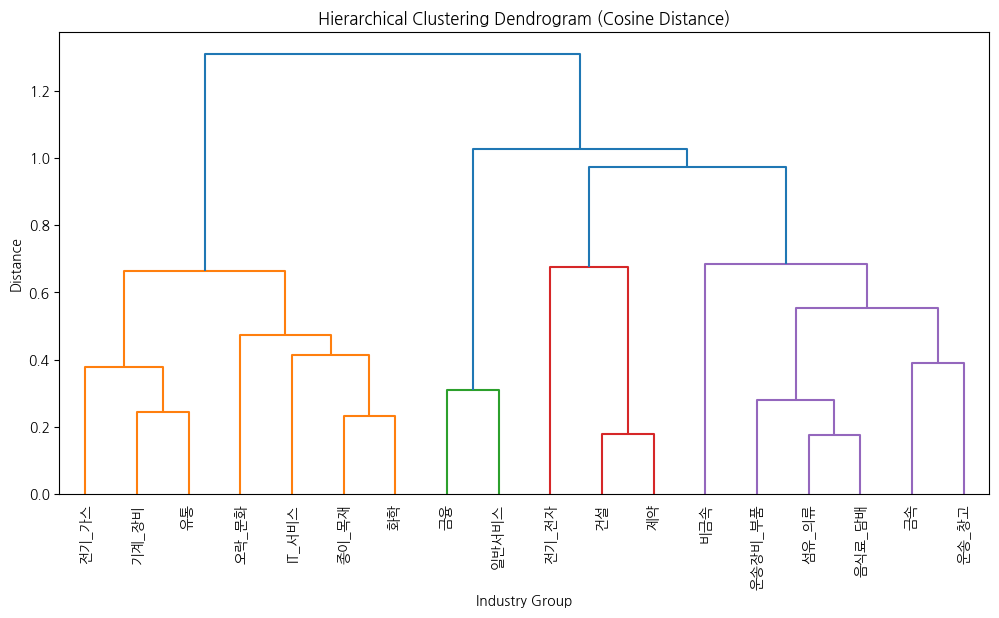

In [ ]:
# üîπ 2Ô∏è‚É£ Îç¥ÎìúÎ°úÍ∑∏Îû® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
dendrogram(
    clusters,
    labels=data_prime.index,  # ÏÇ∞ÏóÖÎ™ÖÏùÑ ÎùºÎ≤®Î°ú ÌëúÏãú
    leaf_rotation=90,  # ÎùºÎ≤® Í∞ÄÎèÖÏÑ±ÏùÑ ÏúÑÌï¥ 90ÎèÑ ÌöåÏ†Ñ
    leaf_font_size=10,  # Í∏ÄÏûê ÌÅ¨Í∏∞ ÏÑ§Ï†ï
    color_threshold=0.7  # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÍ∏∞ ÏÉâÏÉÅ Íµ¨Î∂Ñ Í∏∞Ï§ÄÍ∞í
)
plt.title("Hierarchical Clustering Dendrogram (Cosine Distance)")
plt.xlabel("Industry Group")
plt.ylabel("Distance")
plt.show()

In [ ]:
data_prime_cos = data_prime.copy()
data_prime_cos['hc_cluster'] = cut_tree
data_prime_cos['silhouette_coeff'] = score_samples
data_prime_cos

ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®    Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ    Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®     ÏòÅÏóÖÏù¥ÏùµÎ•†    Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®    Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•  log_ÎãπÏ¢åÎπÑÏú®  \
ÏóÖÏ¢Ö                                                                              
IT_ÏÑúÎπÑÏä§  -0.347381 -0.022014 -1.011320 -0.673756  1.351377  0.265121 -0.980421   
Í±¥ÏÑ§       0.199163  0.003823 -0.408447 -0.033771 -0.769466 -0.285760 -0.023875   
Í∏àÏÜç       0.307698 -0.546152  0.088166  0.130776  0.359158  1.575482  0.281417   
Í∏àÏúµ       0.809334 -0.659287  0.103386 -2.330154  0.040162  0.006133  2.727287   
Í∏∞Í≥Ñ_Ïû•ÎπÑ   -1.808590  0.946484 -0.360218 -0.385162  0.783238 -0.493371 -1.000942   
ÎπÑÍ∏àÏÜç     -0.584617  0.840462  1.258901  3.089891 -0.067237  1.156543 -0.276026   
ÏÑ¨Ïú†_ÏùòÎ•ò    2.652665 -1.616000  0.631089  1.019803 -1.424850  2.880337  0.839731   
Ïò§ÎùΩ_Î¨∏Ìôî   -0.670145  0.581788 -1.332363  0.162168  0.669050  0.893058  0.413445   
Ïö¥ÏÜ°_Ï∞ΩÍ≥†   -0.199163 -0.287385 -0.823440  0.477134 -0.040162  0.649823  0.428360   
Ïö¥ÏÜ°Ïû•ÎπÑ_Î∂ÄÌíà  0.500605 -0.590708 -0.026155 -0.183994 -0.899521  0.345204  0.670517   
Ïú†ÌÜµ      -0.266719  0.239525 -0.017023  0.091841  0.068827 -0.083915 -0.598477   
ÏùåÏãùÎ£å_Îã¥Î∞∞   0.734924 -0.349635  0.395931  0.531147 -0.775069  0.389369  0.398991   
ÏùºÎ∞òÏÑúÎπÑÏä§    0.396953 -0.938531  0.503484 -0.701577  0.219628 -0.784047  0.719758   
Ï†ÑÍ∏∞_Í∞ÄÏä§   -1.782428  3.132341  1.354150  0.607629 -1.588742 -0.643726 -3.066906   
Ï†ÑÍ∏∞_Ï†ÑÏûê    0.231906 -0.003823  0.078053 -0.241955 -0.399587 -0.304476  0.023875   
Ï†úÏïΩ       0.635691  0.195536 -1.112225  0.033771 -1.166776 -0.006133 -0.506045   
Ï¢ÖÏù¥_Î™©Ïû¨   -1.812441  1.596190  0.017023 -0.999711  0.228566 -1.630840 -1.694615   
ÌôîÌïô      -0.267178  0.266545 -0.766791 -0.809382  0.199897 -0.452228 -0.391855   

         ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ  hc_cluster  silhouette_coeff  
ÏóÖÏ¢Ö                                               
IT_ÏÑúÎπÑÏä§  -0.693053           1          0.510055  
Í±¥ÏÑ§      -0.487227           3          0.529851  
Í∏àÏÜç       0.639641           4          0.522305  
Í∏àÏúµ      -0.090203           2          0.668203  
Í∏∞Í≥Ñ_Ïû•ÎπÑ    0.090203           1          0.634732  
ÎπÑÍ∏àÏÜç      2.486471           4          0.440959  
ÏÑ¨Ïú†_ÏùòÎ•ò    3.301633           4          0.623841  
Ïò§ÎùΩ_Î¨∏Ìôî   -2.754241           1          0.318547  
Ïö¥ÏÜ°_Ï∞ΩÍ≥†    0.751785           4          0.453306  
Ïö¥ÏÜ°Ïû•ÎπÑ_Î∂ÄÌíà  0.155790           4         -0.063031  
Ïú†ÌÜµ       0.167193           1          0.427982  
ÏùåÏãùÎ£å_Îã¥Î∞∞   0.301040           4          0.369635  
ÏùºÎ∞òÏÑúÎπÑÏä§   -0.512105           2          0.690595  
Ï†ÑÍ∏∞_Í∞ÄÏä§   -1.517891           1          0.335257  
Ï†ÑÍ∏∞_Ï†ÑÏûê    0.369232           3          0.091555  
Ï†úÏïΩ      -0.192898           3          0.544839  
Ï¢ÖÏù¥_Î™©Ïû¨   -2.051897           1          0.604622  
ÌôîÌïô      -1.057538           1          0.400674

ÎπÑÍ∏àÏÜç Ïö¥ÏÜ°Ï∞ΩÍ≥† / Ïò§ÎùΩ ÏùåÏãùÎ£å Ï†ÑÍ∏∞Í∞ÄÏä§ (ÏÇ≠Ï†ú) / Ïö¥ÏÜ°Ïû•ÎπÑ Ï†ÑÍ∏∞Ï†ÑÏûê Í∏àÏúµ (ÏÇ≠Ï†ú)

In [ ]:
data_prime_cos.to_csv('/content/drive/MyDrive/DSL/EDA/25-1/data/·ÑÉ·Ö•·ÑÜ·ÖµX·Ñâ·Ö°·Ü´·Ñã·Ö•·Ü∏·Ñá·Öß·ÜØdata/clustered_cos.csv')

## GMM

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
X_1 = df_beta_scaled.reset_index(drop=True).values

In [ ]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò ÏµúÏ†ÅÌôî (2~6Í∞ú ÏãúÎèÑ)
bic_scores = []
n_clusters = range(2, 8)

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_1)   #
    bic_scores.append(gmm.bic(X_1))

# BIC ÏµúÏÜåÍ∞íÏùÑ Í∞ÄÏßÄÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò ÏÑ†ÌÉù
optimal_n = n_clusters[np.argmin(bic_scores)]
print(f"ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò: {optimal_n}")

ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò: 4


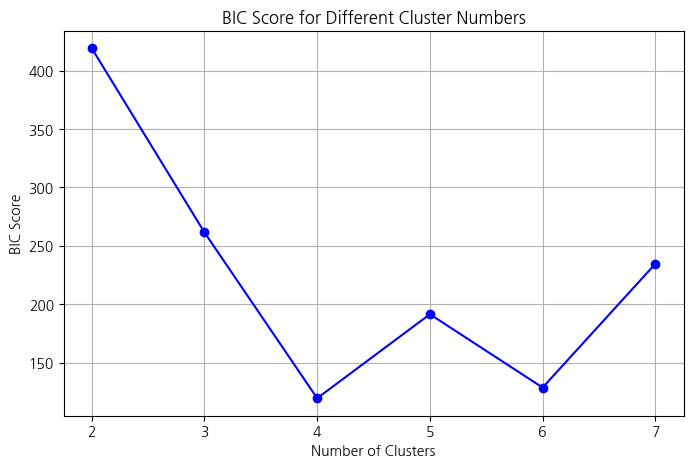

In [ ]:
# BIC Ïä§ÏΩîÏñ¥ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(n_clusters, bic_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score for Different Cluster Numbers')
plt.grid(True)
plt.show()

In [ ]:
# ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò 4Í∞úÏùº ÎïåÏùò BIC Í∞í ÌôïÏù∏
optimal_gmm = GaussianMixture(n_components = 4, random_state=42)
optimal_gmm.fit(X_1)
optimal_bic = optimal_gmm.bic(X_1)

print(f"BIC Score (n=4): {optimal_bic}")

BIC Score (n=4): 119.38944004516122


ÎÑàÎ¨¥ ÎÜíÏùå. Í∏∞Í∞Å

# ÏãúÍ∞ÅÌôî


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

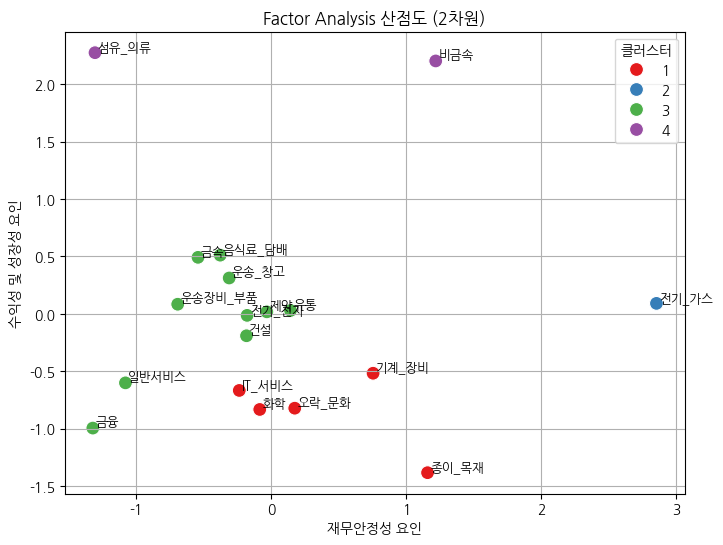

In [ ]:
# beta_robust_scaled: RobustScalerÎ°ú Ïä§ÏºÄÏùºÎßÅÌïú Î≤†ÌÉÄÍ∞í DataFrame, 'cluster' Ïª¨ÎüºÏù¥ Ï°¥Ïû¨ÌïúÎã§Í≥† Í∞ÄÏ†ï
# ÏòàÏãú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏàòÏ†ïÌïòÏÑ∏Ïöî)
# beta_robust_scaled = pd.read_csv("beta_robust_scaled.csv", index_col=0)

# 'cluster' Ïª¨ÎüºÏùÑ Ï†úÏô∏Ìïú Îç∞Ïù¥ÌÑ∞Î°ú FA ÏàòÌñâ
fa = FactorAnalysis(n_components=2, random_state=42, rotation='varimax')
fa_result = fa.fit_transform(df_beta_scaled)

# Í≤∞Í≥º DataFrame ÏÉùÏÑ±: Í∞Å Ï∂ïÏóê "Factor 1", "Factor 2"ÎùºÎäî Ïù¥Î¶Ñ Î∂ÄÏó¨
fa_df = pd.DataFrame(fa_result, columns=['Factor 1', 'Factor 2'], index=df_see.index)
fa_df['cluster'] = df_see['hc_cluster']

# ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî: ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú ÏÉâÏÉÅ Íµ¨Î∂ÑÌïòÍ≥†, Í∞Å ÏóÖÏ¢Ö Ïù¥Î¶ÑÏùÑ ÌÖçÏä§Ìä∏Î°ú ÌëúÏãú
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Factor 1', y='Factor 2', hue='cluster', data=fa_df, palette='Set1', s=100)

# Í∞Å Ï†êÏóê ÏóÖÏ¢Ö Ïù¥Î¶ÑÏùÑ ÌÖçÏä§Ìä∏Î°ú Ï∂îÍ∞Ä
for industry in fa_df.index:
    plt.text(fa_df.loc[industry, 'Factor 1'] + 0.02,
             fa_df.loc[industry, 'Factor 2'] + 0.02,
             industry, fontsize=9)

plt.title("Factor Analysis ÏÇ∞Ï†êÎèÑ (2Ï∞®Ïõê)")
plt.xlabel("Ïû¨Î¨¥ÏïàÏ†ïÏÑ± ÏöîÏù∏")
plt.ylabel("ÏàòÏùµÏÑ± Î∞è ÏÑ±Ïû•ÏÑ± ÏöîÏù∏")
plt.legend(title='ÌÅ¥Îü¨Ïä§ÌÑ∞')
plt.grid(True)
plt.show()

ÌÅ¥Îü¨Ïä§ÌÑ∞	Ï£ºÏöî ÏÇ∞ÏóÖ	ÌäπÏßï

ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 (Îπ®Í∞ÑÏÉâ)	Í∏∞Í≥Ñ_Ïû•ÎπÑ, Ï¢ÖÏù¥_Î™©Ïû¨, IT_ÏÑúÎπÑÏä§, ÌôîÌïô, Ïò§ÎùΩ_Î¨∏Ìôî	Î∂ÄÏ±Ñ ÏùòÏ°¥ÎèÑÍ∞Ä ÎÜíÍ≥† ÏàòÏùµÏÑ±Ïù¥ ÎÇÆÏïÑ Î¶¨Ïä§ÌÅ¨Í∞Ä ÏûàÏùå

ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (ÌååÎûÄÏÉâ)	Ï†ÑÍ∏∞_Í∞ÄÏä§	Ïû¨Î¨¥Íµ¨Ï°∞Í∞Ä ÌäºÌäºÌïòÏßÄÎßå ÏÑ±Ïû•ÏÑ±Ïù¥ ÌÅ¨ÏßÄ ÏïäÏùå

ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 (Ï¥àÎ°ùÏÉâ)	Í∏àÏúµ, ÏùºÎ∞òÏÑúÎπÑÏä§, Ïö¥ÏÜ°¬∑Ïû•ÎπÑ¬∑Î∂ÄÌíà, Í±¥ÏÑ§, Ïú†ÌÜµ, ÏùåÏãùÎ£å¬∑Îã¥Î∞∞ Îì±	Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò Î∂ÄÏ±Ñ ÏùòÏ°¥ÎèÑÎ•º Í∞ÄÏßÄÎ©∞ ÏàòÏùµÏÑ±Ïù¥ ÎÜíÏïÑ ÏÑ±Ïû•Ïù¥ Í∏∞ÎåÄÎê®

ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 (Î≥¥ÎùºÏÉâ)	ÏÑ¨Ïú†_ÏùòÎ•ò, ÎπÑÍ∏àÏÜç	ÏàòÏùµÏÑ±Í≥º ÏÑ±Ïû•ÏÑ±Ïù¥ Í∞ÄÏû• ÎÜíÏßÄÎßå Ïû¨Î¨¥Íµ¨Ï°∞Îäî Ï§ëÎ¶ΩÏ†Å

Factor Loadings DataFrame:
          Factor 1  Factor 2
ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®   -0.837932  0.469382
Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ    0.974481 -0.237455
Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®    0.215400  0.363024
ÏòÅÏóÖÏù¥ÏùµÎ•†     0.365092  0.831288
Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®   -0.079061 -0.345249
Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•   -0.378259  0.707553
log_ÎãπÏ¢åÎπÑÏú® -0.994225  0.104830
ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ -0.456342  1.135135


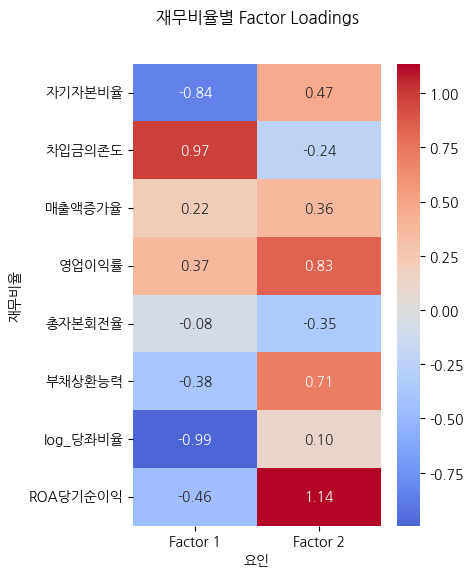

In [ ]:
loadings = fa.components_.T

# Factor Ïù¥Î¶Ñ ÏßÄÏ†ï (Ïòà: Factor 1, Factor 2)
factor_names = [f"Factor {i+1}" for i in range(loadings.shape[1])]

# Î°úÎî©Í∞í DataFrame ÏÉùÏÑ±: indexÎäî Ïû¨Î¨¥ÎπÑÏú® Ïù¥Î¶Ñ, columnsÎäî Factor Ïù¥Î¶Ñ
loadings_df = pd.DataFrame(loadings, index=df_beta_scaled.columns, columns=factor_names)

# Î°úÎî©Í∞í DataFrame Ï∂úÎ†•
print("Factor Loadings DataFrame:")
print(loadings_df)

# --- ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî ---

plt.figure(figsize=(4, 6))
sns.heatmap(loadings_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Ïû¨Î¨¥ÎπÑÏú®Î≥Ñ Factor Loadings", pad=30)
plt.xlabel("ÏöîÏù∏")
plt.ylabel("Ïû¨Î¨¥ÎπÑÏú®")
plt.show()

1: Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ / 2: ROA, ÏòÅÏóÖÏù¥ÏùµÎ•†,

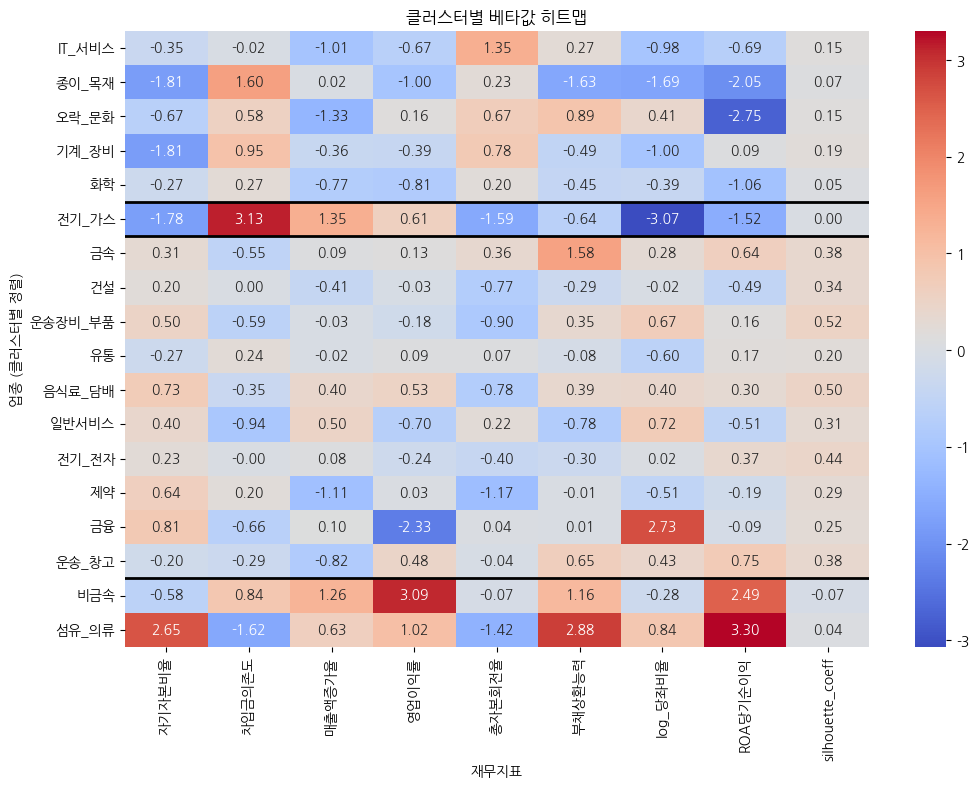

In [ ]:
# beta_robust_scaled: RobustScalerÎ•º Ï†ÅÏö©Ìïú Î≤†ÌÉÄÍ∞í DataFrame (ÏóÖÏ¢Ö√óÏû¨Î¨¥ÏßÄÌëú)
# cluster_assignments: Í∞Å ÏóÖÏ¢ÖÏóê Ìï†ÎãπÎêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏ (Ïòà: Series ÌòπÏùÄ DataFrameÏùò 'cluster' Ïª¨Îüº)
# ÏòàÎ•º Îì§Ïñ¥:
# beta_robust_scaled['cluster'] = cluster_assignments

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Ï†ïÎ†¨ (cluster Ïª¨Îüº Í∏∞Ï§Ä)
df_pca = df_see.copy()  # ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏Í∞Ä Îã¥Í∏¥ Ïª¨Îüº Ï∂îÍ∞Ä
df_pca= df_pca.sort_values('hc_cluster')

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞ (cluster Ïª¨ÎüºÏùÄ Ï†úÏô∏)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df_pca.drop('hc_cluster', axis=1), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Î≤†ÌÉÄÍ∞í ÌûàÌä∏Îßµ")
plt.xlabel("Ïû¨Î¨¥ÏßÄÌëú")
plt.ylabel("ÏóÖÏ¢Ö (ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï†ïÎ†¨)")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤ΩÍ≥ÑÏÑ† Ï∂îÍ∞ÄÌïòÍ∏∞
# Ï†ïÎ†¨Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò 'cluster' Ïª¨Îüº Í∞íÏùÑ numpy arrayÎ°ú Î≥ÄÌôò
cluster_labels = df_pca['hc_cluster'].values

# ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Î≥ÄÍ≤ΩÎêòÎäî Ïù∏Îç±Ïä§Î•º Ï∞æÏäµÎãàÎã§.
boundaries = []
prev = cluster_labels[0]
for idx, cl in enumerate(cluster_labels):
    if cl != prev:
        boundaries.append(idx)  # idxÍ∞Ä ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥ÄÍ≤Ω ÏãúÏûë Ïù∏Îç±Ïä§
        prev = cl

# ÌûàÌä∏ÎßµÏóê ÏàòÌèâÏÑ† Ï∂îÍ∞Ä (axhlineÎäî y Ï¢åÌëúÏóê ÏÑ†ÏùÑ Í∑∏Î¶º)
for b in boundaries:
    ax.axhline(b, color='black', lw=2)

plt.show()

In [ ]:
p_df = pd.read_csv('/content/drive/MyDrive/DSL/EDA/25-1/data/·ÑÉ·Ö•·ÑÜ·ÖµX·Ñâ·Ö°·Ü´·Ñã·Ö•·Ü∏·Ñá·Öß·ÜØdata/·Ñâ·Ö°·Ü´·Ñã·Ö•·Ü∏·Ñá·Öß·ÜØ_p·ÑÄ·Ö°·Üπ_nonshift_final.csv')

In [ ]:
p_df.set_index('ÏóÖÏ¢Ö', inplace=True)
p_df.index = p_df.index.str.replace("df_ÏΩîÏä§Ìîº_", "")

ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®    Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ    Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®     ÏòÅÏóÖÏù¥ÏùµÎ•†    Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®    Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•  log_ÎãπÏ¢åÎπÑÏú®  \
ÏóÖÏ¢Ö                                                                             
IT_ÏÑúÎπÑÏä§  0.051232  0.732692  0.582348  0.973863  0.058864  0.607057  0.127110   
Í±¥ÏÑ§      0.665093  0.694555  0.986243  0.209040  0.683197  0.937973  0.929928   
Í∏àÏÜç      0.719123  0.313666  0.328234  0.122633  0.173984  0.000900  0.374121   

        ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ  
ÏóÖÏ¢Ö                
IT_ÏÑúÎπÑÏä§  0.881440  
Í±¥ÏÑ§      0.898634  
Í∏àÏÜç      0.091856

In [ ]:
p_df

ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®    Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ    Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®     ÏòÅÏóÖÏù¥ÏùµÎ•†    Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®    Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•  log_ÎãπÏ¢åÎπÑÏú®  \
ÏóÖÏ¢Ö                                                                              
IT_ÏÑúÎπÑÏä§   0.051232  0.732692  0.582348  0.973863  0.058864  0.607057  0.127110   
Í±¥ÏÑ§       0.665093  0.694555  0.986243  0.209040  0.683197  0.937973  0.929928   
Í∏àÏÜç       0.719123  0.313666  0.328234  0.122633  0.173984  0.000900  0.374121   
Í∏àÏúµ       0.866902  0.684015  0.779446  0.205897  0.270696  0.775048  0.154148   
Í∏∞Í≥Ñ_Ïû•ÎπÑ    0.013494  0.023950  0.945303  0.622769  0.062710  0.773907  0.143830   
ÎπÑÍ∏àÏÜç      0.212656  0.083047  0.082418  0.000189  0.466328  0.068504  0.761209   
ÏÑ¨Ïú†_ÏùòÎ•ò    0.004605  0.012844  0.178318  0.000563  0.381914  0.000002  0.064328   
Ïò§ÎùΩ_Î¨∏Ìôî    0.269927  0.318963  0.248405  0.692047  0.104151  0.370402  0.291970   
Ïö¥ÏÜ°_Ï∞ΩÍ≥†    0.475104  0.904869  0.655657  0.418523  0.782177  0.065622  0.527895   
Ïö¥ÏÜ°Ïû•ÎπÑ_Î∂ÄÌíà  0.908944  0.329755  0.417589  0.235985  0.336122  0.229902  0.043646   
Ïú†ÌÜµ       0.073477  0.248478  0.337565  0.138771  0.357325  0.596159  0.299341   
ÏùåÏãùÎ£å_Îã¥Î∞∞   0.798747  0.732494  0.162785  0.051557  0.533966  0.210382  0.356429   
ÏùºÎ∞òÏÑúÎπÑÏä§    0.871709  0.307233  0.310410  0.999978  0.610400  0.734692  0.302869   
Ï†ÑÍ∏∞_Í∞ÄÏä§    0.000212  0.000011  0.225251  0.096124  0.213831  0.620045  0.001025   
Ï†ÑÍ∏∞_Ï†ÑÏûê    0.603351  0.610014  0.419114  0.232849  0.931279  0.963692  0.825521   
Ï†úÏïΩ       0.923634  0.396604  0.074179  0.264962  0.306727  0.613133  0.606783   
Ï¢ÖÏù¥_Î™©Ïû¨    0.012148  0.013107  0.550857  0.511133  0.356169  0.153352  0.049939   
ÌôîÌïô       0.045741  0.115806  0.289232  0.748984  0.158333  0.804807  0.385372   

             ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ  
ÏóÖÏ¢Ö                     
IT_ÏÑúÎπÑÏä§   8.814397e-01  
Í±¥ÏÑ§       8.986336e-01  
Í∏àÏÜç       9.185625e-02  
Í∏àÏúµ       5.787090e-01  
Í∏∞Í≥Ñ_Ïû•ÎπÑ    5.047904e-01  
ÎπÑÍ∏àÏÜç      4.643399e-07  
ÏÑ¨Ïú†_ÏùòÎ•ò    4.392248e-04  
Ïò§ÎùΩ_Î¨∏Ìôî    2.478131e-01  
Ïö¥ÏÜ°_Ï∞ΩÍ≥†    2.032988e-01  
Ïö¥ÏÜ°Ïû•ÎπÑ_Î∂ÄÌíà  1.732473e-01  
Ïú†ÌÜµ       1.356604e-01  
ÏùåÏãùÎ£å_Îã¥Î∞∞   1.932466e-01  
ÏùºÎ∞òÏÑúÎπÑÏä§    9.348621e-01  
Ï†ÑÍ∏∞_Í∞ÄÏä§    1.644593e-01  
Ï†ÑÍ∏∞_Ï†ÑÏûê    9.335142e-02  
Ï†úÏïΩ       5.709507e-01  
Ï¢ÖÏù¥_Î™©Ïû¨    4.778548e-02  
ÌôîÌïô       3.947755e-01

In [ ]:
df_see

ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏú®    Ï∞®ÏûÖÍ∏àÏùòÏ°¥ÎèÑ    Îß§Ï∂úÏï°Ï¶ùÍ∞ÄÏú®     ÏòÅÏóÖÏù¥ÏùµÎ•†    Ï¥ùÏûêÎ≥∏ÌöåÏ†ÑÏú®    Î∂ÄÏ±ÑÏÉÅÌôòÎä•Î†•  log_ÎãπÏ¢åÎπÑÏú®  \
ÏóÖÏ¢Ö                                                                              
IT_ÏÑúÎπÑÏä§  -0.347381 -0.022014 -1.011320 -0.673756  1.351377  0.265121 -0.980421   
Í±¥ÏÑ§       0.199163  0.003823 -0.408447 -0.033771 -0.769466 -0.285760 -0.023875   
Í∏àÏÜç       0.307698 -0.546152  0.088166  0.130776  0.359158  1.575482  0.281417   
Í∏àÏúµ       0.809334 -0.659287  0.103386 -2.330154  0.040162  0.006133  2.727287   
Í∏∞Í≥Ñ_Ïû•ÎπÑ   -1.808590  0.946484 -0.360218 -0.385162  0.783238 -0.493371 -1.000942   
ÎπÑÍ∏àÏÜç     -0.584617  0.840462  1.258901  3.089891 -0.067237  1.156543 -0.276026   
ÏÑ¨Ïú†_ÏùòÎ•ò    2.652665 -1.616000  0.631089  1.019803 -1.424850  2.880337  0.839731   
Ïò§ÎùΩ_Î¨∏Ìôî   -0.670145  0.581788 -1.332363  0.162168  0.669050  0.893058  0.413445   
Ïö¥ÏÜ°_Ï∞ΩÍ≥†   -0.199163 -0.287385 -0.823440  0.477134 -0.040162  0.649823  0.428360   
Ïö¥ÏÜ°Ïû•ÎπÑ_Î∂ÄÌíà  0.500605 -0.590708 -0.026155 -0.183994 -0.899521  0.345204  0.670517   
Ïú†ÌÜµ      -0.266719  0.239525 -0.017023  0.091841  0.068827 -0.083915 -0.598477   
ÏùåÏãùÎ£å_Îã¥Î∞∞   0.734924 -0.349635  0.395931  0.531147 -0.775069  0.389369  0.398991   
ÏùºÎ∞òÏÑúÎπÑÏä§    0.396953 -0.938531  0.503484 -0.701577  0.219628 -0.784047  0.719758   
Ï†ÑÍ∏∞_Í∞ÄÏä§   -1.782428  3.132341  1.354150  0.607629 -1.588742 -0.643726 -3.066906   
Ï†ÑÍ∏∞_Ï†ÑÏûê    0.231906 -0.003823  0.078053 -0.241955 -0.399587 -0.304476  0.023875   
Ï†úÏïΩ       0.635691  0.195536 -1.112225  0.033771 -1.166776 -0.006133 -0.506045   
Ï¢ÖÏù¥_Î™©Ïû¨   -1.812441  1.596190  0.017023 -0.999711  0.228566 -1.630840 -1.694615   
ÌôîÌïô      -0.267178  0.266545 -0.766791 -0.809382  0.199897 -0.452228 -0.391855   

         ROAÎãπÍ∏∞ÏàúÏù¥Ïùµ  hc_cluster  silhouette_coeff  
ÏóÖÏ¢Ö                                               
IT_ÏÑúÎπÑÏä§  -0.693053           1          0.149109  
Í±¥ÏÑ§      -0.487227           3          0.343815  
Í∏àÏÜç       0.639641           3          0.377228  
Í∏àÏúµ      -0.090203           3          0.253686  
Í∏∞Í≥Ñ_Ïû•ÎπÑ    0.090203           1          0.192949  
ÎπÑÍ∏àÏÜç      2.486471           4         -0.072264  
ÏÑ¨Ïú†_ÏùòÎ•ò    3.301633           4          0.042831  
Ïò§ÎùΩ_Î¨∏Ìôî   -2.754241           1          0.146171  
Ïö¥ÏÜ°_Ï∞ΩÍ≥†    0.751785           3          0.382576  
Ïö¥ÏÜ°Ïû•ÎπÑ_Î∂ÄÌíà  0.155790           3          0.520645  
Ïú†ÌÜµ       0.167193           3          0.201517  
ÏùåÏãùÎ£å_Îã¥Î∞∞   0.301040           3          0.504594  
ÏùºÎ∞òÏÑúÎπÑÏä§   -0.512105           3          0.306975  
Ï†ÑÍ∏∞_Í∞ÄÏä§   -1.517891           2          0.000000  
Ï†ÑÍ∏∞_Ï†ÑÏûê    0.369232           3          0.444588  
Ï†úÏïΩ      -0.192898           3          0.290635  
Ï¢ÖÏù¥_Î™©Ïû¨   -2.051897           1          0.071068  
ÌôîÌïô      -1.057538           1          0.052733

In [ ]:
#Î†àÏù¥Îçî Ï∞®Ìä∏

def make_radar_chart(categories, values, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    ax.set_title(title)
    ax.set_title(title, pad=30)  # ÌïÑÏöîÏóê Îî∞Îùº pad Í∞íÏùÑ Ï°∞Ï†ï
    ax.grid(True)
    plt.show()

In [ ]:
df_cl = data_prime.drop(columns='silhouette_coeff')

## Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ ver

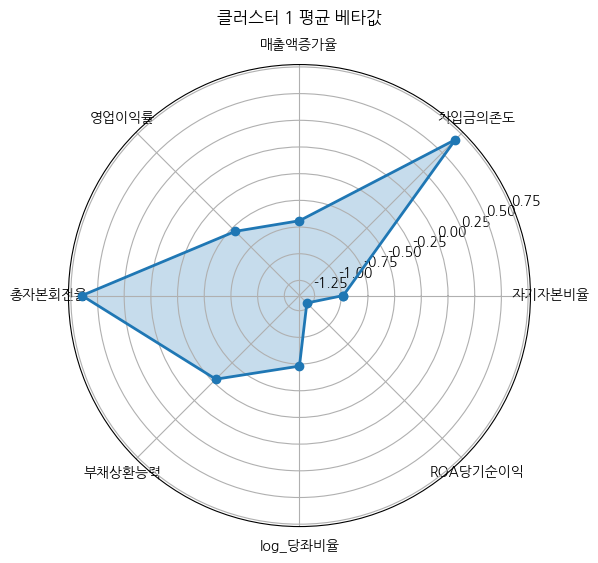

In [ ]:
cluster1_data = df_cl[df_cl['hc_cluster'] == 1].drop('hc_cluster', axis=1).mean()
categories = list(cluster1_data.index)
values = cluster1_data.values
make_radar_chart(categories, values, "ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 ÌèâÍ∑† Î≤†ÌÉÄÍ∞í")

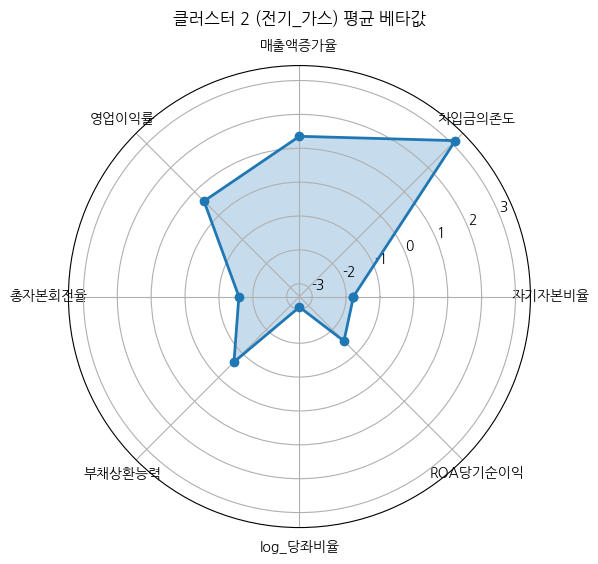

In [ ]:
# ÏòàÏãú: Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑† Î≤†ÌÉÄÍ∞í (Ïó¨Í∏∞ÏÑúÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ 2, Ï†ÑÍ∏∞_Í∞ÄÏä§Îßå Îã®ÎèÖÏúºÎ°ú ÏòàÏãú)

cluster2_data = df_cl[df_cl['hc_cluster'] == 2].drop('hc_cluster', axis=1).mean()
categories = list(cluster2_data.index)
values = cluster2_data.values
make_radar_chart(categories, values, "ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (Ï†ÑÍ∏∞_Í∞ÄÏä§) ÌèâÍ∑† Î≤†ÌÉÄÍ∞í")

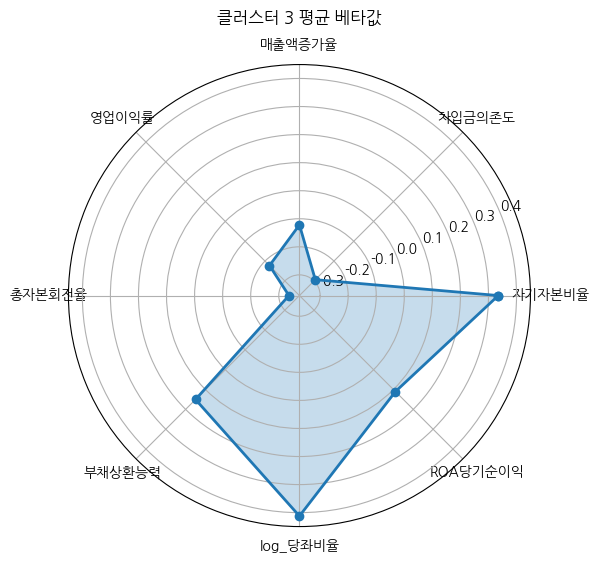

In [ ]:
cluster3_data = df_cl[df_cl['hc_cluster'] == 3].drop('hc_cluster', axis=1).mean()
categories = list(cluster3_data.index)
values = cluster3_data.values
make_radar_chart(categories, values, "ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 ÌèâÍ∑† Î≤†ÌÉÄÍ∞í")

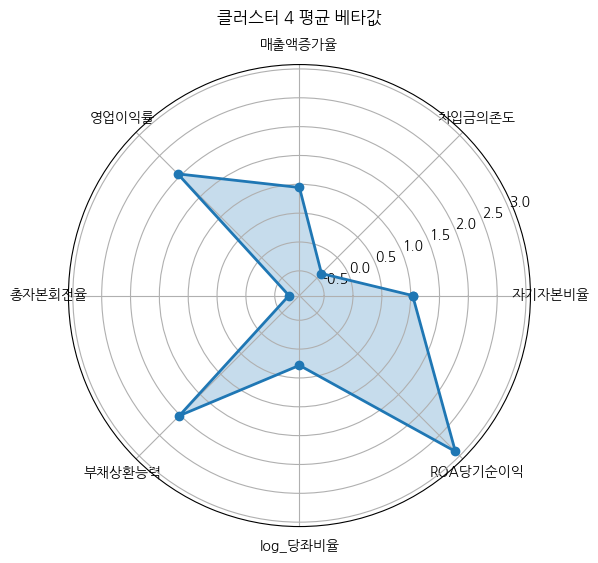

In [ ]:
cluster4_data = df_cl[df_cl['hc_cluster'] == 4].drop('hc_cluster', axis=1).mean()
categories = list(cluster4_data.index)
values = cluster4_data.values
make_radar_chart(categories, values, "ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 ÌèâÍ∑† Î≤†ÌÉÄÍ∞í")